# ***Línea 144 - Grupo 2***


---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4


El objetivo es analizar cómo han variado los casos de violencia a lo largo del tiempo, prestando especial atención a los períodos  durante y después de las restricciones de la pandemia. Determinar cuáles tipos de violencia (física, psicológica, sexual, económica, etc.) han mostrado mayores variaciones y en qué contexto (doméstica, institucional, laboral, etc.). Investigar cómo factores como la edad influyen en los tipos de violencia reportados. La idea es desarrollar modelos predictivos para anticipar posibles tendencias en la incidencia de violencia en los próximos años.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Linea 144.csv', delimiter = ',')
df_final = df.copy()

In [ ]:
pd.options.display.max_columns = None # Muestra todas las columnas al imprimir df

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89535,2020,12/31/2020,Buenos Aires,Mujer,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
89536,2020,12/31/2020,Buenos Aires,Mujer,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
89537,2020,12/31/2020,Buenos Aires,Mujer,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
89538,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


# **Descripción de la base y sus variables**

In [ ]:
df_final.columns

Index(['Anio', 'Fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia'],
      dtype='object')

<Axes: >

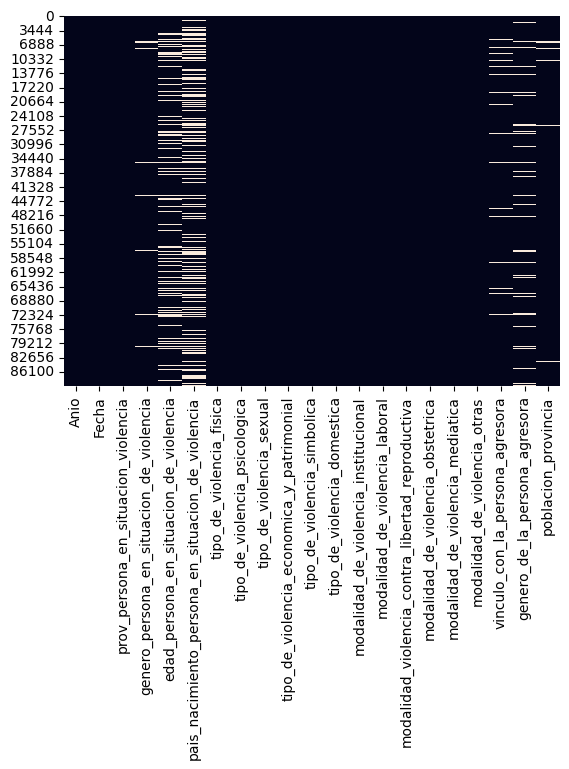

In [ ]:
# Gráfico de valores faltantes
sns.heatmap(df_final.isnull(), cbar=False)

La mayoría de las columnas del dataset estan completas, salvo las columnas de género, edad y país de nacimiento de la persona en situación de violencia, como también vínculo y género de la persona agresora.

In [ ]:
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df_final.isna().sum()
df_info_nulos['Porcentaje'] = (df_final.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df_final.dtypes
df_info_nulos.sort_values(by='Porcentaje', ascending=False)

,Cantidad,Porcentaje,Tipo de dato
pais_nacimiento_persona_en_situacion_de_violencia,30281,33.82,object
edad_persona_en_situacion_de_violencia,17278,19.30,float64
genero_de_la_persona_agresora,9213,10.29,object
vinculo_con_la_persona_agresora,3395,3.79,object
genero_persona_en_situacion_de_violencia,1904,2.13,object
poblacion_provincia,1312,1.47,object
modalidad_de_violencia_institucional,0,0.00,object
modalidad_de_violencia_otras,0,0.00,object
modalidad_de_violencia_mediatica,0,0.00,object
modalidad_de_violencia_obstetrica,0,0.00,object


## **Año**
Año del ingreso de la consulta

In [ ]:
df_final['Anio'].describe()

count    89540.000000
mean      2021.165312
std          1.012090
min       2020.000000
25%       2020.000000
50%       2021.000000
75%       2022.000000
max       2023.000000
Name: Anio, dtype: float64

Los datos estan comprendidos desde el 2020 al 2023

## **Provincia**
Provincia en donde la persona en situación de violencia declara estar residiendo al momento de la consulta

In [ ]:
df_final['prov_persona_en_situacion_violencia'].describe()

count            89539
unique              27
top       Buenos Aires
freq             48565
Name: prov_persona_en_situacion_violencia, dtype: object

In [ ]:
df_final['prov_persona_en_situacion_violencia'].unique()

array(['Buenos Aires', 'Entre Ríos', 'Mendoza', 'Tucumán', 'Santa Fe',
       'Misiones', 'San Luis', 'Córdoba', 'Jujuy', 'Río Negro',
       'San Juan', 'Salta', 'Santiago Del Estero',
       'Ciudad Autónoma de Buenos Aires', 'Chaco', 'Formosa', nan,
       'Neuquén', 'Sin datos', 'Catamarca', 'Corrientes', 'La Rioja',
       'La Pampa', 'Chubut', 'Sin Datos', 'Santa Cruz',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santiago del Estero'], dtype=object)

En esta variable se puede detectar los valores "Sin Datos" y "Sin datos" que se reemplazarán por nan. Además la provincia Santiago del Estero se encuentra escrita de dos maneras diferentes (Santiago Del Estero y Santiago del Estero), se reemplazará la primera opción por la segunda.

In [ ]:
df_final['prov_persona_en_situacion_violencia'] = df_final['prov_persona_en_situacion_violencia'].replace('Sin Datos', np.nan)
df_final['prov_persona_en_situacion_violencia'] = df_final['prov_persona_en_situacion_violencia'].replace('Sin datos', np.nan)
df_final['prov_persona_en_situacion_violencia'] = df_final['prov_persona_en_situacion_violencia'].replace('Santiago Del Estero', 'Santiago del Estero')

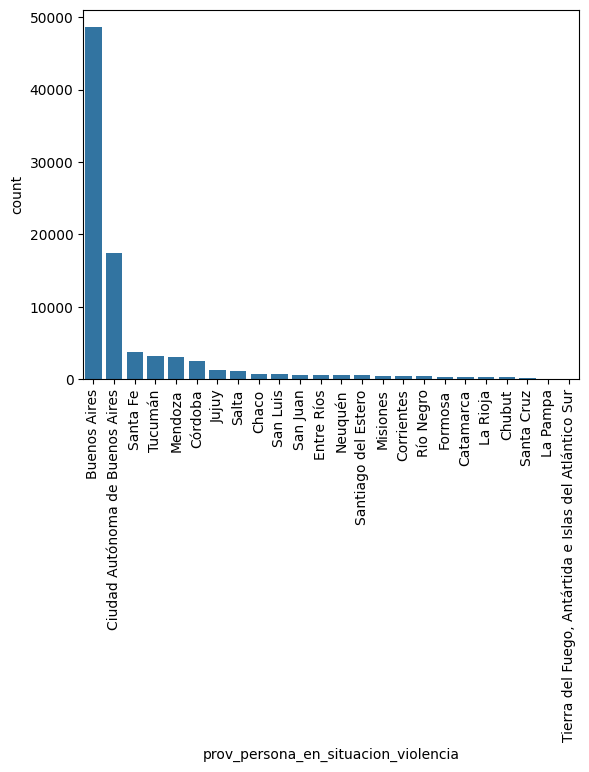

In [ ]:
 sns.countplot(x='prov_persona_en_situacion_violencia', data=df_final, order=df_final['prov_persona_en_situacion_violencia'].value_counts().index)
 plt.xticks(rotation=90)
 plt.show()

In [ ]:
# Cantidad de valores faltantes
df_final['prov_persona_en_situacion_violencia'].isna().sum()

1312

In [ ]:
#Porcentaje de valores faltantes
df_final['prov_persona_en_situacion_violencia'].isna().sum()/ len(df_final) * 100

1.4652669198123742

Los datos nulos se reemplazarán por la provincia más frecuente, en este caso Buenos Aires


In [ ]:
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
df_final["prov_persona_en_situacion_violencia"].mode()

0    Buenos Aires
Name: prov_persona_en_situacion_violencia, dtype: object

In [ ]:
# Se reemplaza los nan por el valor mas frecuente
prov_imputado = imputer_most_frequent.fit_transform(df_final[['prov_persona_en_situacion_violencia']])

In [ ]:
prov_imputado = prov_imputado.squeeze(axis=1)

In [ ]:
df_final["prov_persona_en_situacion_violencia"] = prov_imputado

In [ ]:
df_final['prov_persona_en_situacion_violencia'].isna().sum()

0

In [ ]:
df_final.shape

(89540, 21)

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89535,2020,12/31/2020,Buenos Aires,Mujer,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
89536,2020,12/31/2020,Buenos Aires,Mujer,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
89537,2020,12/31/2020,Buenos Aires,Mujer,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
89538,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


## **Género**
Identidad de género autopercibida de la persona en situación de violencia

In [ ]:
df_final['genero_persona_en_situacion_de_violencia'].describe()

count     87636
unique       12
top       Mujer
freq      86883
Name: genero_persona_en_situacion_de_violencia, dtype: object

In [ ]:
df_final['genero_persona_en_situacion_de_violencia'].value_counts() / len(df_final) * 100

genero_persona_en_situacion_de_violencia
Mujer          97.032611
Varon           0.389770
Transgenero     0.168640
Mujer Trans     0.157472
Otro            0.074827
Varón Trans     0.014519
Varon Trans     0.013402
Travesti        0.012285
Intersexual     0.004467
No Binarie      0.003350
Varon trans     0.001117
Queer           0.001117
Name: count, dtype: float64

Como el 97% de los datos ingresados corresponden al género Mujer, solo se tendran en cuenta estos casos.

In [ ]:
# Obtengo solo los datos de género Mujer
df_final = df_final[df_final['genero_persona_en_situacion_de_violencia'] == 'Mujer']
# Comprobación
df_final['genero_persona_en_situacion_de_violencia'].unique()

array(['Mujer'], dtype=object)

In [ ]:
# Elimino la columna género
df_final = df_final.drop(columns=['genero_persona_en_situacion_de_violencia'])

In [ ]:
df_final.shape

(86883, 20)

Se eliminaron 753

## **País**
País de nacimiento de la persona en situación de violencia

In [ ]:
df_final['pais_nacimiento_persona_en_situacion_de_violencia'].describe()

count         58162
unique           45
top       Argentina
freq          52072
Name: pais_nacimiento_persona_en_situacion_de_violencia, dtype: object

In [ ]:
df_final['pais_nacimiento_persona_en_situacion_de_violencia'].value_counts() / len(df) * 100

pais_nacimiento_persona_en_situacion_de_violencia
Argentina         58.155015
Paraguaya          2.788698
Boliviana          1.393790
Peruana            1.047577
Venezolana         0.499218
Colombiana         0.250168
Uruguaya           0.222247
Brasileña          0.147420
Chilena            0.138486
Otra               0.116149
Otro               0.044673
Dominicana         0.025687
Estadounidense     0.013402
Española           0.013402
Ecuatoriana        0.012285
Armenia            0.011168
Mexicana           0.008935
Alemana            0.008935
Cubana             0.007818
Australiana        0.006701
ARMENIA            0.005584
Italiana           0.005584
Salvadoreña        0.003350
Arabe              0.002234
Belga              0.002234
Rusa               0.002234
Japonesa           0.002234
Guatemalteca       0.002234
Nicaragüense       0.001117
Israelí            0.001117
peruana            0.001117
Costarricense      0.001117
Vietnamita         0.001117
Turca              0.00111

In [ ]:
#Porcentaje de valores faltantes
df_final['pais_nacimiento_persona_en_situacion_de_violencia'].isna().sum()/ len(df) * 100

32.07616707616708

## **Edad**
Edad declarada de la persona en situación de violencia al momento en que se ingresó la consulta

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].describe()

count    70789.000000
mean        35.685657
std         12.567342
min          1.000000
25%         27.000000
50%         34.000000
75%         42.000000
max        103.000000
Name: edad_persona_en_situacion_de_violencia, dtype: float64

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].unique()

array([ nan,  19.,  46.,  28.,  34.,  38.,  57.,  39.,  24.,  22.,  52.,
        65.,  26.,  41.,  44.,  40.,  27.,  42.,  25.,  49.,  15.,  23.,
        20.,   5.,  29.,  45.,  18.,  33.,  36.,  31.,  37.,  51.,  30.,
        17.,  35.,  48.,  32.,  43.,  55.,  59.,  50.,  21.,  53.,  54.,
        72.,  56.,  12.,  60.,  47.,  62.,  64.,  16.,  70.,  71.,  61.,
        68.,   7.,  66.,  67.,  58.,  74.,  79.,  73.,  13.,  10.,  76.,
        75.,  14.,   4.,  63.,  11.,  77.,  87.,  69.,  86.,   9.,   8.,
        88.,  80.,  78.,  85.,  84.,  82.,  92.,   2.,   6.,  81.,  90.,
         1.,  94.,  83.,  89.,   3., 103.,  93.,  91.,  95., 100.,  97.])

Vemos que el mínimo es 1 y el máximo es 103 por lo cual deberíamos ver posibles outliers para la variable. Agregamos la distribución de la variable edad

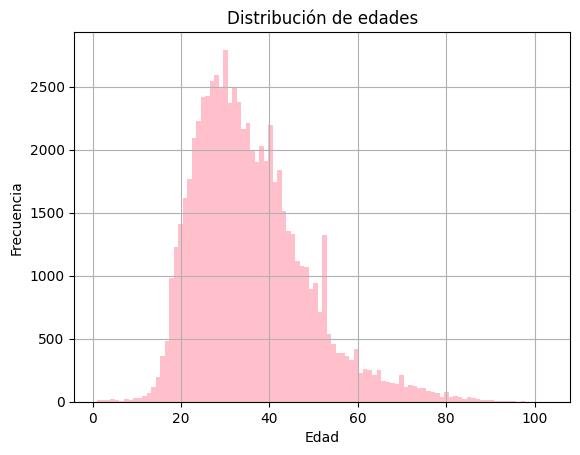

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].hist(bins=100, color='pink')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

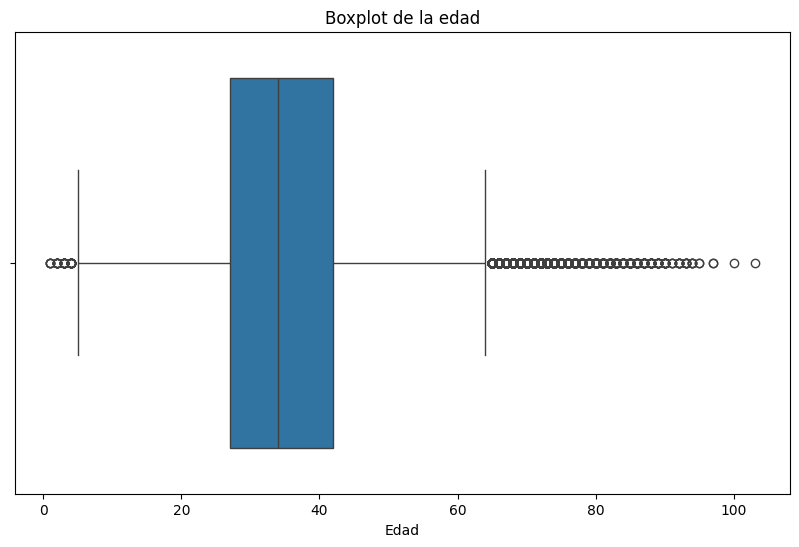

In [ ]:
# Boxplot edad para la comprobacion de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='edad_persona_en_situacion_de_violencia',data=df_final)
plt.title('Boxplot de la edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
# Rango Intercuartílico (OUTLIERS)
# Elimina todos aquellos valores menores al primer cuartil menos 1.5 veces el RIC o mayores al tercer cuartil más 1.5 veces el RIC.
q1 = df_final['edad_persona_en_situacion_de_violencia'].quantile(0.25)
q3 = df_final['edad_persona_en_situacion_de_violencia'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)
df_final = df_final[(df_final['edad_persona_en_situacion_de_violencia'] > lb) & (df_final['edad_persona_en_situacion_de_violencia'] < ub)]
df_final.reset_index(drop=True, inplace=True)
print(lb, ub)

4.5 64.5


In [ ]:
df_final.shape

(68431, 20)

Se eliminaron 2358 datos

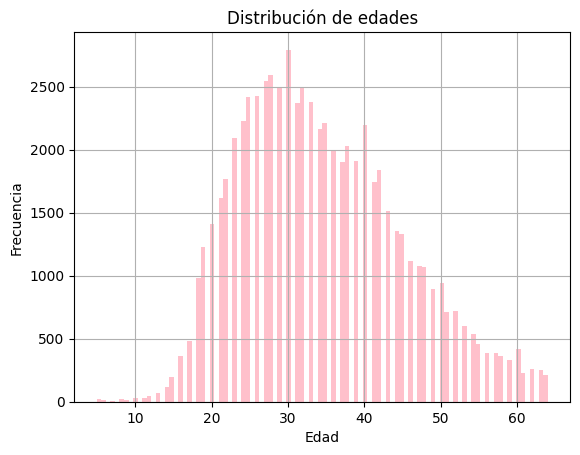

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].hist(bins=100, color='pink')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


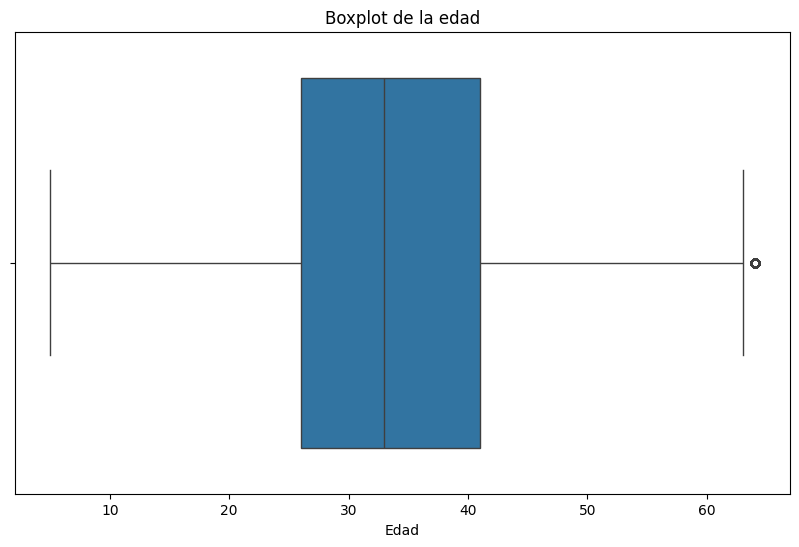

In [ ]:
# Boxplot edad para la comprobacion de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='edad_persona_en_situacion_de_violencia',data=df_final)
plt.title('Boxplot de la edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].unique()

array([19., 46., 28., 34., 38., 57., 39., 24., 22., 52., 26., 41., 44.,
       40., 27., 42., 25., 49., 15., 23., 20.,  5., 29., 45., 18., 33.,
       36., 31., 37., 51., 30., 17., 35., 48., 32., 43., 55., 59., 50.,
       21., 53., 54., 56., 12., 60., 47., 62., 64., 16., 61.,  7., 58.,
       13., 10., 14., 63., 11.,  9.,  8.,  6.])

In [ ]:
df_final['edad_persona_en_situacion_de_violencia'].describe()

count    68431.00000
mean        34.45288
std         10.65308
min          5.00000
25%         26.00000
50%         33.00000
75%         41.00000
max         64.00000
Name: edad_persona_en_situacion_de_violencia, dtype: float64

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [ ]:
#Cantidad de datos faltantes
df_final['edad_persona_en_situacion_de_violencia'].isna().sum()

0

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


## **Tipos de violencia**
Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta

### **Violencia física**

In [ ]:
df_final['tipo_de_violencia_fisica'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
df_final['tipo_de_violencia_fisica'].value_counts() / len(df_final) * 100

tipo_de_violencia_fisica
Si    68.023264
No    31.976736
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_fisica'].describe()

count     68431
unique        2
top          Si
freq      46549
Name: tipo_de_violencia_fisica, dtype: object

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


### **Violencia psicológica**

In [ ]:
df_final['tipo_de_violencia_psicologica'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
df_final['tipo_de_violencia_psicologica'].value_counts() / len(df_final) * 100

tipo_de_violencia_psicologica
Si    95.896597
No     4.103403
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_psicologica'].describe()

count     68431
unique        2
top          Si
freq      65623
Name: tipo_de_violencia_psicologica, dtype: object

### **Violencia sexual**

In [ ]:
df_final['tipo_de_violencia_sexual'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
# Se reemplaza "SI" por "Si"
df_final['tipo_de_violencia_sexual'].replace("SI","Si", inplace=True)

In [ ]:
df_final['tipo_de_violencia_sexual'].value_counts() / len(df_final) * 100

tipo_de_violencia_sexual
No    84.889889
Si    15.110111
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_sexual'].describe()

count     68431
unique        2
top          No
freq      58091
Name: tipo_de_violencia_sexual, dtype: object

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


### **Violencia económica y patrimonial**

In [ ]:
df_final['tipo_de_violencia_economica_y_patrimonial'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df_final['tipo_de_violencia_economica_y_patrimonial'].value_counts() / len(df_final) * 100

tipo_de_violencia_economica_y_patrimonial
No    57.304438
Si    42.695562
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_economica_y_patrimonial'].describe()

count     68431
unique        2
top          No
freq      39214
Name: tipo_de_violencia_economica_y_patrimonial, dtype: object

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


### **Violencia simbólica**

In [ ]:
df_final['tipo_de_violencia_simbolica'].unique()

array(['No', 'Si', 'SI'], dtype=object)

In [ ]:
df_final['tipo_de_violencia_simbolica'].replace("SI","Si",inplace=True)

In [ ]:
df_final['tipo_de_violencia_simbolica'].value_counts() / len(df_final) * 100

tipo_de_violencia_simbolica
No    64.670982
Si    35.329018
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_simbolica'].describe()

count     68431
unique        2
top          No
freq      44255
Name: tipo_de_violencia_simbolica, dtype: object

### **Violencia doméstica**

In [ ]:
df_final['tipo_de_violencia_domestica'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df_final['tipo_de_violencia_domestica'].value_counts() / len(df_final) * 100

tipo_de_violencia_domestica
Si    92.121991
No     7.878009
Name: count, dtype: float64

In [ ]:
df_final['tipo_de_violencia_domestica'].describe()

count     68431
unique        2
top          Si
freq      63040
Name: tipo_de_violencia_domestica, dtype: object

In [ ]:
df_final

,Anio,Fecha,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,19.0,Argentina,Si,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,46.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,28.0,NaN,No,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,34.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,38.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68426,2020,12/31/2020,Buenos Aires,30.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Pareja,Varon,17569053
68427,2020,12/31/2020,Buenos Aires,40.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
68428,2020,12/31/2020,Buenos Aires,22.0,NaN,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
68429,2020,12/31/2020,Buenos Aires,44.0,Argentina,Si,Si,No,No,Si,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


## **Vínculo con la persona agresora**
Vínculo que tiene o tenía la persona en situación de violencia con quien ejerce la agresión en el momento en que sucedieron las situaciones de violencia declaradas

In [ ]:
df_final['vinculo_con_la_persona_agresora'].unique()

array(['Otro', 'Pareja', 'Ex pareja', 'Padre o tutor',
       'Superior jerarquico', nan, 'Otro familiar', 'Madre o tutor'],
      dtype=object)

In [ ]:
df_final['vinculo_con_la_persona_agresora'].value_counts() / len(df_final) * 100

vinculo_con_la_persona_agresora
Ex pareja              49.708465
Pareja                 36.638366
Otro                    6.877000
Otro familiar           2.815975
Padre o tutor           1.335652
Superior jerarquico     0.455934
Madre o tutor           0.191434
Name: count, dtype: float64

In [ ]:
df_final['vinculo_con_la_persona_agresora'].describe()

count         67078
unique            7
top       Ex pareja
freq          34016
Name: vinculo_con_la_persona_agresora, dtype: object

In [ ]:
# Cantidad de valores faltantes
df_final['vinculo_con_la_persona_agresora'].isna().sum()

1353

In [ ]:
# Se reemplaza por el mas frecuente
vinculo_imputado = imputer_most_frequent.fit_transform(df_final[['vinculo_con_la_persona_agresora']])

In [ ]:
df_final["vinculo_con_la_persona_agresora"].mode()

0    Ex pareja
Name: vinculo_con_la_persona_agresora, dtype: object

In [ ]:
vinculo_imputado = vinculo_imputado.squeeze(axis=1)

In [ ]:
df_final["vinculo_con_la_persona_agresora"] = vinculo_imputado

In [ ]:
df_final['vinculo_con_la_persona_agresora'].isna().sum()

0

In [ ]:
df_final.shape

(68431, 20)

## **Género de la persona agresora**
Identidad de género de la persona agresora

In [ ]:
df_final["genero_de_la_persona_agresora"].unique()

array(['Varon', nan, 'Mujer', 'Otro', 'No Binarie', 'Transgenero',
       'Varon Trans', 'Travesti', 'Varon trans', 'Mujer Trans', 'Queer'],
      dtype=object)

In [ ]:
df_final['genero_de_la_persona_agresora'].value_counts() / len(df_final) * 100

genero_de_la_persona_agresora
Varon          92.275431
Mujer           1.008315
Otro            0.184127
Varon Trans     0.016075
Transgenero     0.010229
Travesti        0.002923
Varon trans     0.002923
Mujer Trans     0.002923
No Binarie      0.001461
Queer           0.001461
Name: count, dtype: float64

El 92% de los agresores son Varon, al ser un porcentaje muy alto, solo nos quedaremos con estos datos.

In [ ]:
df_final = df_final[df_final['genero_de_la_persona_agresora'] == 'Varon']
df_final['genero_de_la_persona_agresora'].unique()

array(['Varon'], dtype=object)

## **Modalidad de violencia**
Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron

### **Modalidad institucional**

In [ ]:
df_final['modalidad_de_violencia_institucional'].unique()

array(['No', 'Si', 'SI'], dtype=object)

In [ ]:
df_final['modalidad_de_violencia_institucional'].replace("SI","Si",inplace=True)

<ipython-input-84-6d1a0fb53895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['modalidad_de_violencia_institucional'].replace("SI","Si",inplace=True)


In [ ]:
df_final['modalidad_de_violencia_institucional'].value_counts() / len(df) * 100

modalidad_de_violencia_institucional
No    69.574492
Si     0.947063
Name: count, dtype: float64

In [ ]:
df_final['modalidad_de_violencia_institucional'].describe()

count     63145
unique        2
top          No
freq      62297
Name: modalidad_de_violencia_institucional, dtype: object

### **Modalidad laboral**

In [ ]:
df_final['modalidad_de_violencia_laboral'].unique()

array(['No', 'Si', 'SI'], dtype=object)

In [ ]:
df_final['modalidad_de_violencia_laboral'].value_counts() / len(df) * 100

modalidad_de_violencia_laboral
No    69.696225
Si     0.824213
SI     0.001117
Name: count, dtype: float64

In [ ]:
df_final['modalidad_de_violencia_laboral'].describe()

count     63145
unique        3
top          No
freq      62406
Name: modalidad_de_violencia_laboral, dtype: object

### **Modalidad contra la libertad reproductiva**

In [ ]:
df_final['modalidad_violencia_contra_libertad_reproductiva'].unique()

array(['No', 'Si', 'SI'], dtype=object)

In [ ]:
df_final['modalidad_violencia_contra_libertad_reproductiva'].replace("SI","Si",inplace=True)

<ipython-input-91-fda6b4d2cb59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['modalidad_violencia_contra_libertad_reproductiva'].replace("SI","Si",inplace=True)


In [ ]:
df_final['modalidad_violencia_contra_libertad_reproductiva'].value_counts() / len(df) * 100

modalidad_violencia_contra_libertad_reproductiva
No    70.132901
Si     0.388653
Name: count, dtype: float64

In [ ]:
df_final['modalidad_violencia_contra_libertad_reproductiva'].describe()

count     63145
unique        2
top          No
freq      62797
Name: modalidad_violencia_contra_libertad_reproductiva, dtype: object

### **Modalidad obstétrica**

In [ ]:
df_final['modalidad_de_violencia_obstetrica'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df_final['modalidad_de_violencia_obstetrica'].replace("SI","Si",inplace=True)

<ipython-input-95-94f76aa9ae6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['modalidad_de_violencia_obstetrica'].replace("SI","Si",inplace=True)


In [ ]:
df_final['modalidad_de_violencia_obstetrica'].value_counts() / len(df) * 100

modalidad_de_violencia_obstetrica
No    70.510386
Si     0.011168
Name: count, dtype: float64

In [ ]:
df_final['modalidad_de_violencia_obstetrica'].describe()

count     63145
unique        2
top          No
freq      63135
Name: modalidad_de_violencia_obstetrica, dtype: object

### **Modalidad mediática**

In [ ]:
df_final['modalidad_de_violencia_mediatica'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df_final['modalidad_de_violencia_mediatica'].value_counts() / len(df) * 100

modalidad_de_violencia_mediatica
No    70.489167
Si     0.032388
Name: count, dtype: float64

In [ ]:
df_final['modalidad_de_violencia_mediatica'].describe()

count     63145
unique        2
top          No
freq      63116
Name: modalidad_de_violencia_mediatica, dtype: object

### **Otras modalidades**

In [ ]:
df_final['modalidad_de_violencia_otras'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df_final['modalidad_de_violencia_otras'].value_counts() / len(df) * 100

modalidad_de_violencia_otras
No    69.199241
Si     1.322314
Name: count, dtype: float64

In [ ]:
df_final['modalidad_de_violencia_otras'].describe()

count     63145
unique        2
top          No
freq      61961
Name: modalidad_de_violencia_otras, dtype: object

## **Gráficos**

<ipython-input-104-1f854416f302>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorias_edades,palette="Set2")


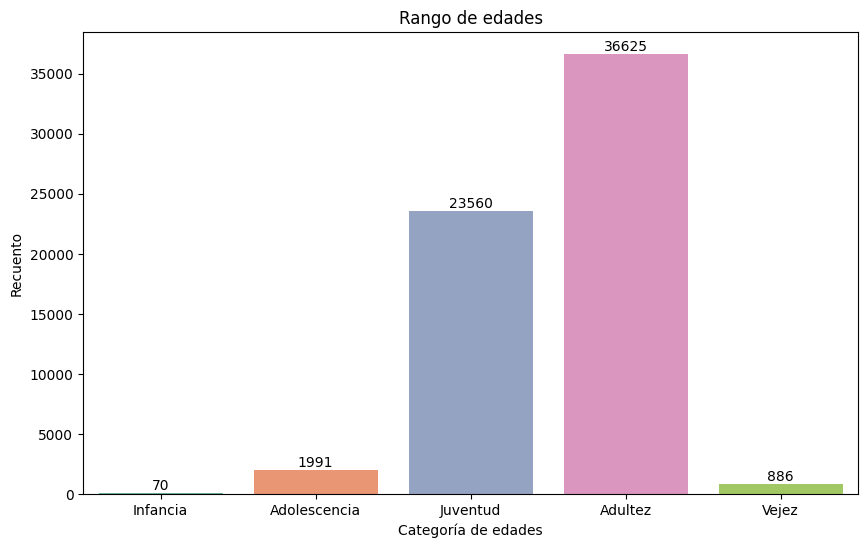

In [ ]:
# Límites de los bins
bin = [5, 10, 18, 30, 60, 80]
# [5, 10], [10, 18], [18, 30], [30, 60], [60, 80]

labels = ["Infancia", "Adolescencia","Juventud", "Adultez", "Vejez"]

categorias_edades = pd.cut(df_final["edad_persona_en_situacion_de_violencia"], bins=bin, labels=labels)

# dataframe temporal
categorias_df = pd.DataFrame(categorias_edades, columns=['categorias_edades'])

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x=categorias_edades,palette="Set2")
plt.title('Rango de edades')
plt.ylabel('Recuento')
plt.xlabel('Categoría de edades')

counts = categorias_edades.value_counts().sort_index()
for i, v in enumerate(counts.values):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.show()

Se puede observar que la mayoria de los casos de violencia son en la adultez en el rango de 30 a 60 años

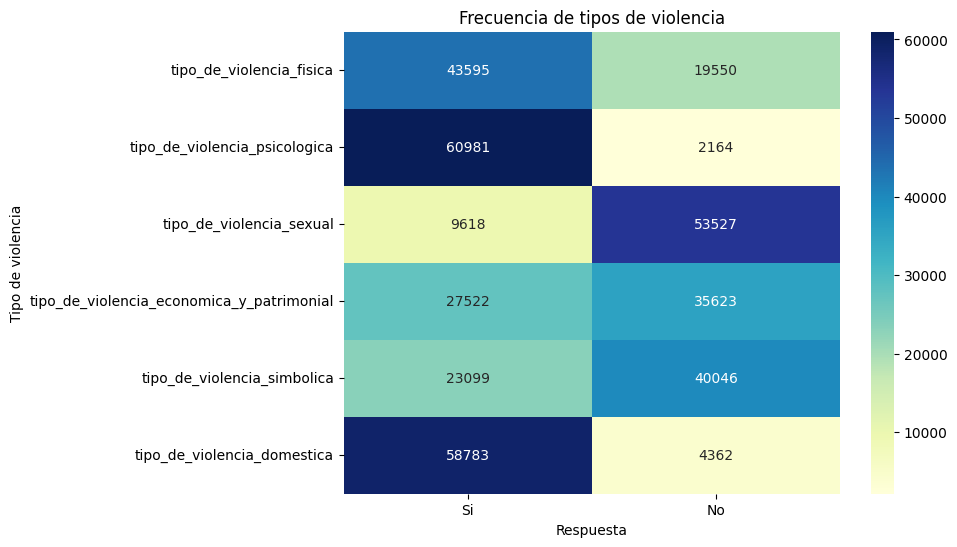

In [ ]:
# Heatmap de tipos de violencia
df_tipos_violencia = df_final[['tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica']]
# Contar las frecuencias de 'Si' y 'No' para cada tipo de violencia
counts = df_tipos_violencia.apply(pd.Series.value_counts).T
counts = counts[['Si', 'No']].fillna(0)

# Gráfico
plt.figure(figsize=(8, 6))
# fmt g enteros sin formato específico de decimales
sns.heatmap(counts, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frecuencia de tipos de violencia')
plt.xlabel('Respuesta')
plt.ylabel('Tipo de violencia')
plt.show()

En este gráfico se puede apreciar la mayoría de las personas sufrieron violencia psicológica y doméstica

In [ ]:
df_final.columns

Index(['Anio', 'Fecha', 'prov_persona_en_situacion_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia'],
      dtype='object')

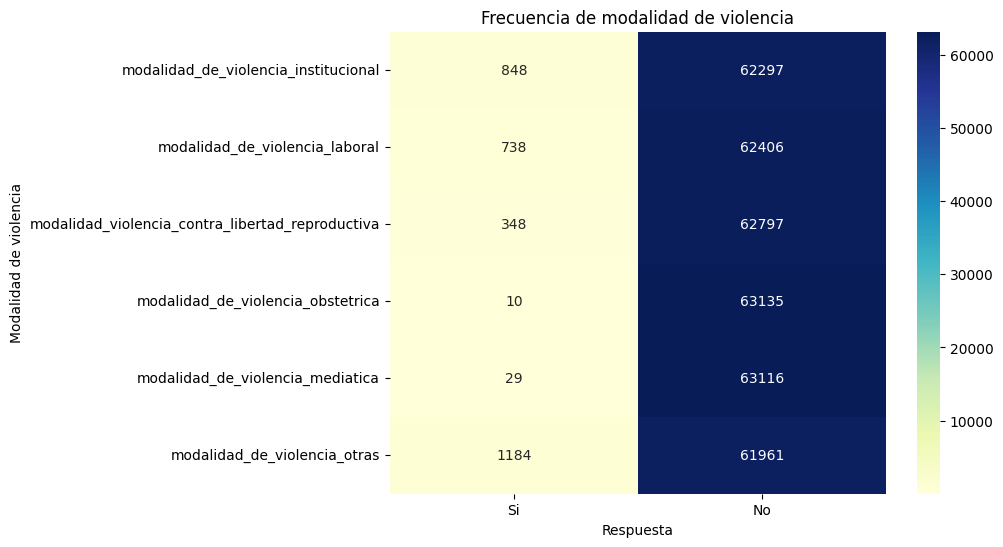

In [ ]:
# Heatmap de modalidad de violencia
df_modalidad_violencia = df_final[['modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', 'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras']]
# Contar las frecuencias de 'Si' y 'No' para cada modalidad de violencia
counts = df_modalidad_violencia.apply(pd.Series.value_counts).T
counts = counts[['Si', 'No']].fillna(0)

# Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frecuencia de modalidad de violencia')
plt.xlabel('Respuesta')
plt.ylabel('Modalidad de violencia')
plt.show()

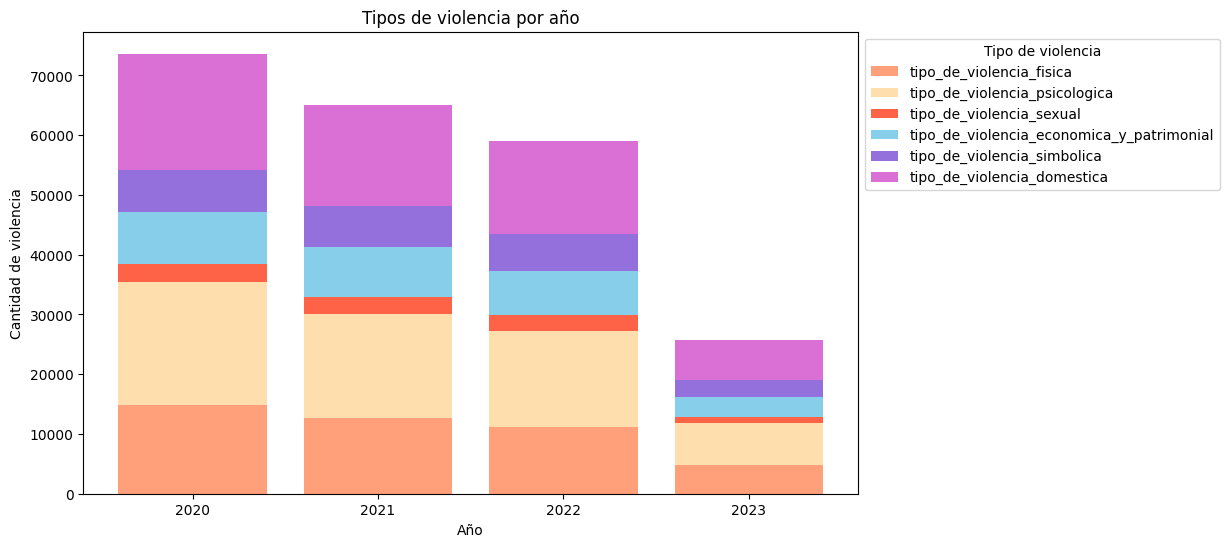

In [ ]:
# Tipos de violencia por año
df_violencia = df_final[['Anio', 'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica']]

# Convertir "Si" a 1 y "No" a 0 en todas las columnas de tipo de violencia (antes de hacer dummies)
df_violencia_numerica = df_violencia.replace({'Si': 1,'SI': 1, 'No': 0})

df_agrupado = df_violencia_numerica.groupby('Anio').sum()

anios = df_agrupado.index
tipos_violencia = df_agrupado.columns

colores = ['lightsalmon', 'navajowhite', 'tomato', 'skyblue', 'mediumpurple', 'orchid']

# Gráfico
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(anios))
for i, tipo_violencia in enumerate(tipos_violencia):
    plt.bar(anios, df_agrupado[tipo_violencia], bottom=bottom, color=colores[i], label=tipo_violencia)
    bottom += df_agrupado[tipo_violencia]

plt.legend(title='Tipo de violencia', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Tipos de violencia por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de violencia')
plt.xticks(anios)
plt.show()

In [ ]:
df_final['Anio'].value_counts()

Anio
2020    21294
2021    18005
2022    16649
2023     7197
Name: count, dtype: int64

## **Drop de variables**

Se eliminan las variables que no son de interés

In [ ]:
df_final = df_final.drop(columns=['Anio'])
df_final = df_final.drop(columns=['Fecha'])
df_final = df_final.drop(columns=['modalidad_de_violencia_institucional'])
df_final = df_final.drop(columns=['modalidad_de_violencia_otras'])
df_final = df_final.drop(columns=['modalidad_de_violencia_mediatica'])
df_final = df_final.drop(columns=['modalidad_de_violencia_obstetrica'])
df_final = df_final.drop(columns=['modalidad_violencia_contra_libertad_reproductiva'])
df_final = df_final.drop(columns=['modalidad_de_violencia_laboral'])
df_final = df_final.drop(columns=['poblacion_provincia'])
df_final = df_final.drop(columns=['pais_nacimiento_persona_en_situacion_de_violencia'])

In [ ]:
df_final.drop(columns=['genero_de_la_persona_agresora'],inplace=True)

In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,Buenos Aires,19.0,Si,Si,Si,No,No,No,Otro
1,Buenos Aires,46.0,Si,Si,No,No,Si,Si,Pareja
2,Entre Ríos,28.0,No,Si,No,No,Si,Si,Pareja
3,Mendoza,34.0,No,Si,No,No,No,Si,Ex pareja
4,Buenos Aires,38.0,Si,Si,No,Si,No,Si,Ex pareja
...,...,...,...,...,...,...,...,...,...
68425,Buenos Aires,36.0,No,Si,No,No,Si,Si,Pareja
68426,Buenos Aires,30.0,Si,Si,No,No,Si,Si,Pareja
68428,Buenos Aires,22.0,Si,Si,No,No,Si,Si,Ex pareja
68429,Buenos Aires,44.0,Si,Si,No,No,Si,Si,Ex pareja


# **Transformación de variables categóricas**

In [ ]:
# Codifica la categoria en valores numericos. Reemplaza la misma columna
label_encoder = LabelEncoder()

In [ ]:
one_hot_encoder = OneHotEncoder()

## **Provincia**

Label encoder reemplaza los valores por un número representativo en la misma columna

In [ ]:
provincia_encoder = LabelEncoder()

In [ ]:
# Para evitar la creación de una columna por cada categoría, utilicé Label Encoder, ya que había demasiadas categorías
df_final['prov_persona_en_situacion_violencia'] = provincia_encoder.fit_transform(df_final['prov_persona_en_situacion_violencia'])

In [ ]:
df_final['prov_persona_en_situacion_violencia'].head(10)

0     0
1     0
2     7
3    12
4     0
5     0
6    20
7    12
8    13
9    20
Name: prov_persona_en_situacion_violencia, dtype: int64

In [ ]:
provincia_encoder.classes_

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Tucumán'],
      dtype=object)

In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,Si,Si,Si,No,No,No,Otro
1,0,46.0,Si,Si,No,No,Si,Si,Pareja
2,7,28.0,No,Si,No,No,Si,Si,Pareja
3,12,34.0,No,Si,No,No,No,Si,Ex pareja
4,0,38.0,Si,Si,No,Si,No,Si,Ex pareja
...,...,...,...,...,...,...,...,...,...
68425,0,36.0,No,Si,No,No,Si,Si,Pareja
68426,0,30.0,Si,Si,No,No,Si,Si,Pareja
68428,0,22.0,Si,Si,No,No,Si,Si,Ex pareja
68429,0,44.0,Si,Si,No,No,Si,Si,Ex pareja


## **Violencia física**

In [ ]:
fisica_encoder = LabelEncoder()
df_final['tipo_de_violencia_fisica'] = fisica_encoder.fit_transform(df_final['tipo_de_violencia_fisica'])

## **Violencia psicológica**

In [ ]:
psicologica_encoder = LabelEncoder()
df_final['tipo_de_violencia_psicologica'] = psicologica_encoder.fit_transform(df_final['tipo_de_violencia_fisica'])

In [ ]:
df_final['tipo_de_violencia_psicologica'].unique()

array([1, 0])

In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,Si,No,No,No,Otro
1,0,46.0,1,1,No,No,Si,Si,Pareja
2,7,28.0,0,0,No,No,Si,Si,Pareja
3,12,34.0,0,0,No,No,No,Si,Ex pareja
4,0,38.0,1,1,No,Si,No,Si,Ex pareja
...,...,...,...,...,...,...,...,...,...
68425,0,36.0,0,0,No,No,Si,Si,Pareja
68426,0,30.0,1,1,No,No,Si,Si,Pareja
68428,0,22.0,1,1,No,No,Si,Si,Ex pareja
68429,0,44.0,1,1,No,No,Si,Si,Ex pareja


## **Violencia sexual**

In [ ]:
sexual_encoder = LabelEncoder()
df_final['tipo_de_violencia_sexual'] = sexual_encoder.fit_transform(df_final['tipo_de_violencia_sexual'])

## **Violencia económica y patrimonial**

In [ ]:
economica_encoder = LabelEncoder()
df_final['tipo_de_violencia_economica_y_patrimonial'] = economica_encoder.fit_transform(df_final['tipo_de_violencia_economica_y_patrimonial'])

## **Violencia simbólica**

In [ ]:
simbolica_encoder = LabelEncoder()
df_final['tipo_de_violencia_simbolica'] = simbolica_encoder.fit_transform(df_final['tipo_de_violencia_simbolica'])

## **Violencia doméstica**

In [ ]:
domestica_encoder = LabelEncoder()
df_final['tipo_de_violencia_domestica'] = domestica_encoder.fit_transform(df_final['tipo_de_violencia_domestica'])

## **Vínculo con el agresor**

In [ ]:
df_final['vinculo_con_la_persona_agresora'].value_counts()

vinculo_con_la_persona_agresora
Ex pareja              32614
Pareja                 23732
Otro                    3997
Otro familiar           1669
Padre o tutor            854
Superior jerarquico      272
Madre o tutor              7
Name: count, dtype: int64

In [ ]:
vinculo_encoder = LabelEncoder()
df_final['vinculo_con_la_persona_agresora'] = vinculo_encoder.fit_transform(df_final['vinculo_con_la_persona_agresora'])
print(df_final['vinculo_con_la_persona_agresora'].head(10))
print("Clases:",vinculo_encoder.classes_)

0    2
1    5
2    5
3    0
4    0
5    5
6    0
7    5
8    5
9    5
Name: vinculo_con_la_persona_agresora, dtype: int64
Clases: ['Ex pareja' 'Madre o tutor' 'Otro' 'Otro familiar' 'Padre o tutor'
 'Pareja' 'Superior jerarquico']


In [ ]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,1,0,0,0,2
1,0,46.0,1,1,0,0,1,1,5
2,7,28.0,0,0,0,0,1,1,5
3,12,34.0,0,0,0,0,0,1,0
4,0,38.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
68425,0,36.0,0,0,0,0,1,1,5
68426,0,30.0,1,1,0,0,1,1,5
68428,0,22.0,1,1,0,0,1,1,0
68429,0,44.0,1,1,0,0,1,1,0


# Detalle de transformación del dataset original

In [ ]:
# Para conocer como cambió nuestro dataset
percent_difference = ((len(df_final) - len(df)) / len(df)) * 100
print(f"Porcentaje de diferencia entre df y df final: {percent_difference:.2f}%")

Porcentaje de diferencia entre df y df final: -29.48%


# **Guardar df final**

In [ ]:
df_final.to_csv('df_final_mod.csv',index=False)